In [27]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import scipy
from tqdm import tqdm
from utils.data_loading import load_disruption_distance, load_papers
from utils.figure_plot import plot_histogram, plot_zoom_histogram

In [2]:
font_path = '../data/font/helvetica.ttf'
font_manager.fontManager.addfont(font_path)

prop = font_manager.FontProperties(family='Helvetica')

# Data Loading

#### Citation network

In [3]:
net = scipy.sparse.load_npz("/data/sg/munjkim/wos/original_1960_2019/citation_net.npz")


In [4]:
citations = np.array(net.sum(axis=0))[0]
references = np.array(net.sum(axis=1)).reshape((1,-1))[0]

#### Paper Information

In [5]:
papers_df = load_papers("/data/sg/munjkim/wos/original_1960_2019/paper_table_paper_id_combined_Nov252024.csv")
papers_df.head()

,woscode,year,date,title,journal,doi,author_number,author_name,Pubtype,paper_id
0,WOS:A1960WH28400013,1960,1960-01-01,OSSIFICATION OF THE CORACO-ACROMIAL LIGAMENT,RADIOLOGY,10.1148/74.5.802,2,"['BERENS, DL', 'LOCKIE, LM']",Article,37961841
1,WOS:A1960WW47600008,1960,1960-01-01,CLINICAL AND PATHOLOGIC ASPECTS OF HYDATIDIFOR...,OBSTETRICS AND GYNECOLOGY,NaN,2,"['REINER, I', 'DOUGHERTY, CM']",Article,37999317
2,WOS:A1960CDS2100006,1960,1960-01-01,CHILDREN OF URANUS,PHI DELTA KAPPAN,NaN,1,"['RAFFERTY, M']",Article,37928349
3,WOS:A1960WE64700022,1960,1960-01-01,ELASTIC PROPERTIES OF CERIUM INFLUENCED BY HYD...,DOKLADY AKADEMII NAUK SSSR,NaN,3,"['VORONOV, FF', 'VERESHCHAGIN, LF', 'GONCHAROV...",Article,37954347
4,WOS:A1960WX62700054,1960,1960-01-01,ACTION OF DDT AT AN INSECT SYNAPSE,JOURNAL OF ECONOMIC ENTOMOLOGY,10.1093/jee/53.1.170,1,"['SMYTH, T']",Note,38000903


In [6]:
papers_df = papers_df[papers_df['Pubtype'].apply(lambda x: x in {'Article','Review', 'Letter','Proceedings Paper'})]

In [7]:
#citation network

papers_df['citations'] = papers_df['paper_id'].apply(lambda x: citations[x])
papers_df['references'] = papers_df['paper_id'].apply(lambda x: references[x])

## Filtering papers with low citations and references

In [8]:
papers_df = papers_df[papers_df['citations']>4]
papers_df = papers_df[papers_df['references']>0]

In [10]:
papers_df = papers_df[papers_df['year']<2017]
papers_df = papers_df[papers_df['year']>1962]

In [12]:
print("The number of papers of interest is", len(papers_df))
print("Published between ", min(papers_df['year']), "and", max(papers_df['year']) )

The number of papers of interest is 23664187
Published between  1963 and 2016


# Loading EDM and Disruption

In [14]:
NETWORKS_NAME = ['original_1960_2019','original_1960_2019/random1']
MEASURE = ['disruption','disruption_nok','100_5_q_1_ep_1_bs_65536_embedding/distance','disruption_5','100_1_q_1_ep_1_bs_65536_embedding/distance','100_1_q_1_ep_2_bs_65536_embedding/distance','100_5_q_1_ep_2_bs_65536_embedding/distance']


for net in tqdm(NETWORKS_NAME):
    for m in MEASURE:
        papers_df = load_disruption_distance(papers_df,net,m)

 50%|███████████████████████████████████████████████████████████▌                                                           | 1/2 [01:17<01:17, 77.43s/it]

no such directory: /data/sg/munjkim/wos/original_1960_2019/random1/disruption_nok.npy


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:25<00:00, 72.92s/it]


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_163832/1740664307.py:2: SyntaxWarning: invalid escape sequence '\D'
  bins=100, color='#2A66FF', alpha=1, figsize=(6, 5), xlabel='$\Delta$',


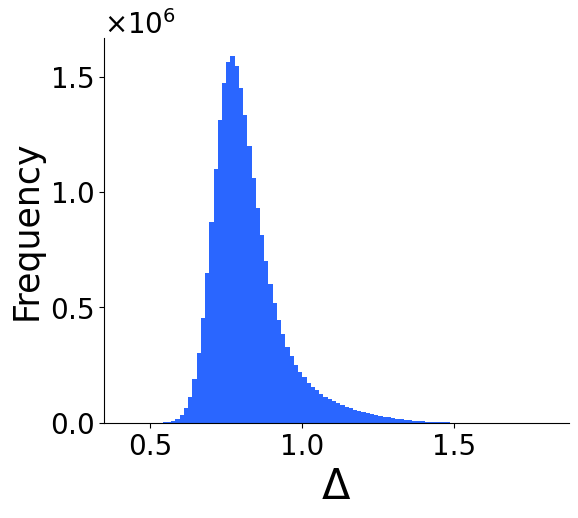

In [16]:
plot_histogram(papers_df, 'original_1960_2019_100_1_q_1_ep_1_bs_65536_embedding_distance',
               bins=100, color='#2A66FF', alpha=1, figsize=(6, 5), xlabel='$\Delta$',
               output_path = '../results/Figures/Figure3a_WOS_Distribution_EDM.png')

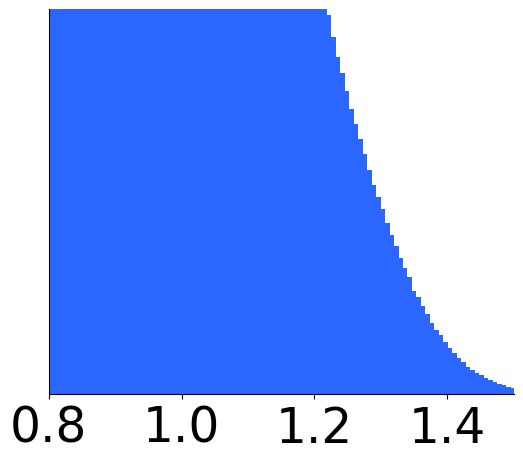

In [19]:
bins = np.linspace(0.8,1.806,150)
plot_zoom_histogram( dataframe=papers_df,
    column_name='original_1960_2019_100_1_q_1_ep_1_bs_65536_embedding_distance',
    bins=bins,
    color='#2A66FF',
    alpha=1,
    xticks=[0.8,1.0,1.2,1.4, 1.6,1.8],
    xlim=(0.8, 1.5),
    ylim=(0, 20000),
    output_path = '../results/Figures/Figure3a_WOS_Distribution_EDM_zoom.png')


# D

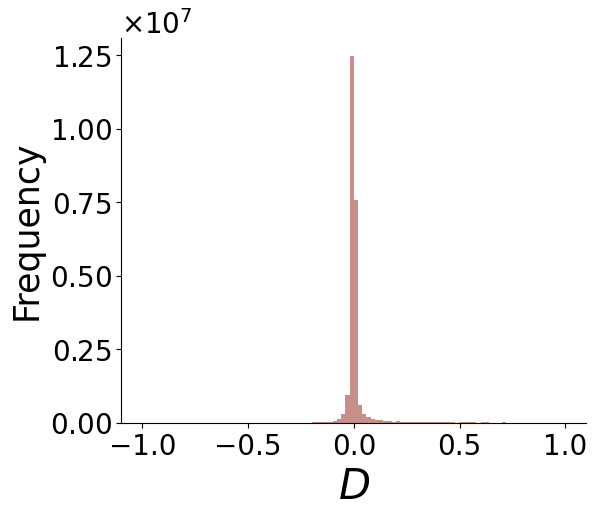

In [21]:
plot_histogram(papers_df, 'original_1960_2019_disruption',
               bins=100, color='#AE6156', alpha=0.7, figsize=(6, 5), xlabel='$D$',
               output_path = '../results/Figures/Figure3a_WOS_Distribution_D.png')


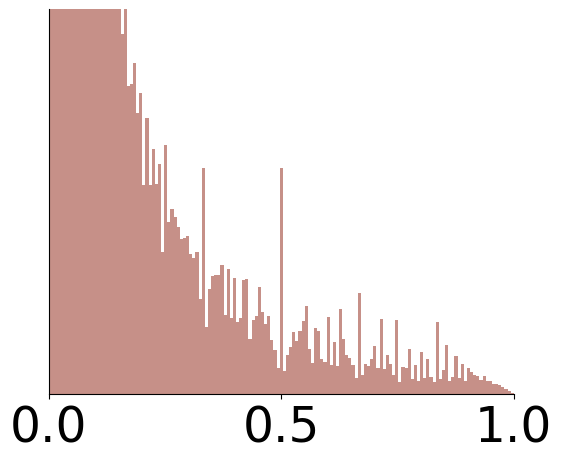

In [22]:
bins = np.linspace(0, 1, 150)


plot_zoom_histogram( dataframe=papers_df,
    column_name='original_1960_2019_disruption',
    bins=bins,
    color='#AE6156',
    alpha=0.7,
    xticks=[0.0,0.5,1],
    xlim=(0, 1),
    ylim=(0,20000),
    output_path = '../results/Figures/Figure3a_WOS_Distribution_D_zoom.png')


# D_{nok}

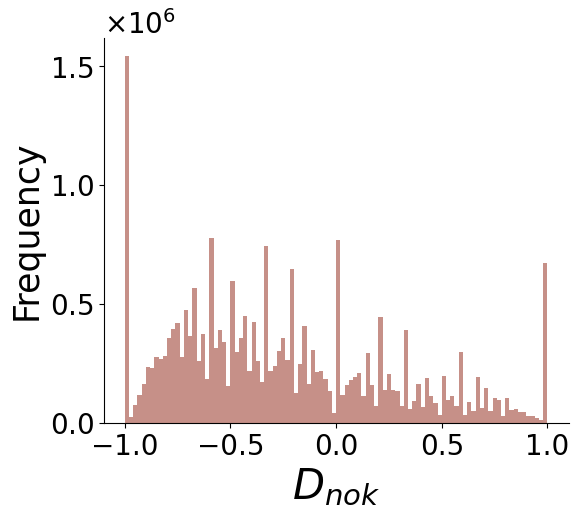

In [24]:
plot_histogram(papers_df, 'original_1960_2019_disruption_nok',
               bins=100, color='#AE6156', alpha=0.7, figsize=(6, 5), xlabel='$D_{nok}$',
               output_path = '../results/Figures/Supplementary_Information/SI_Figure1_WOS_Distribution_D_nok.png')

# D_{5}

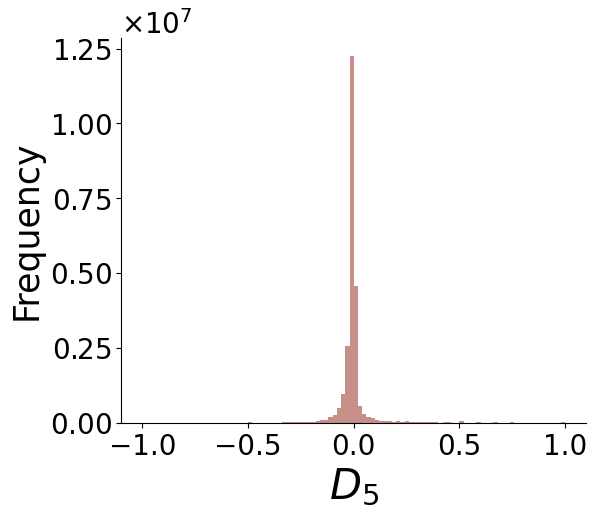

In [25]:


plot_histogram(papers_df, 'original_1960_2019_disruption_5',
               bins=100, color='#AE6156', alpha=0.7, figsize=(6, 5), xlabel='$D_{5}$',
               output_path = '../results/Figures/Supplementary_Information/SI_Figure1_WOS_Distribution_D_5.png')



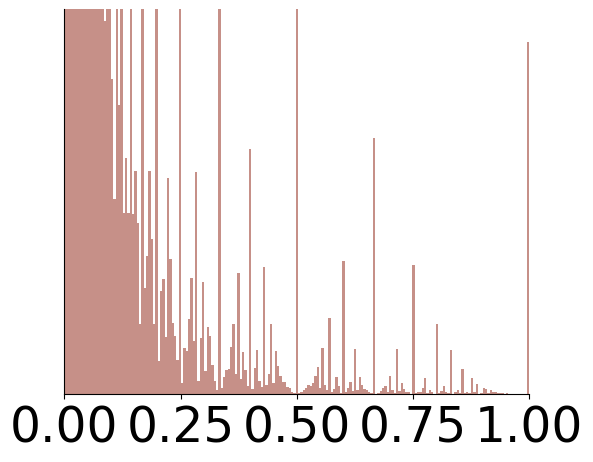

In [26]:
bins = np.linspace(0, 1, 200)

plot_zoom_histogram( dataframe=papers_df,
    column_name='original_1960_2019_disruption_5',
    bins=bins,
    color='#AE6156',
    alpha=0.7,
    xticks=[0.0,0.25,0.5,0.75,1],
    xlim=(0, 1),
    ylim=(0,25000),
    output_path = '../results/Figures/Supplementary_Information/SI_Figure1_WOS_Distribution_D_5_zoom.png')
